In [1]:
%%capture
!pip install transformers

In [2]:
%%capture
!pip install nlp

In [3]:
import transformers
import torch
import numpy as np
import nlp
import utils.train_utils as train_utils
import utils.data_utils as data_utils
from sklearn.model_selection import train_test_split
from config import Config

config = Config()

cuda


In [4]:
ds_train = nlp.load_dataset('imdb', split='train').shuffle()
ds_val_test = nlp.load_dataset('imdb', split='test').shuffle()
ds_val, ds_test = train_test_split(ds_val_test, test_size=0.25)

tknzed_train = data_utils.tokenize_data(ds_train)
tknzed_val = data_utils.tokenize_data(ds_val)
tknzed_test = data_utils.tokenize_data(ds_test)

train_dataloader = data_utils.get_dataloader(tknzed_train)
val_dataloader = data_utils.get_dataloader(tknzed_val)
test_dataloader = data_utils.get_dataloader(tknzed_test)

torch.Size([25000, 256])
torch.Size([25000, 256])
torch.Size([25000])
torch.Size([18750, 256])
torch.Size([18750, 256])
torch.Size([18750])
torch.Size([6250, 256])
torch.Size([6250, 256])
torch.Size([6250])


In [11]:
model = transformers.RobertaForSequenceClassification.from_pretrained(config.model).to('cuda')
loss = torch.nn.CrossEntropyLoss().to('cuda')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifie

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

In [13]:
loss_values, val_loss_values, val_acc = train_utils.run_automodel(auto_model=model, 
                                                      optimizer=optimizer, 
                                                      criterion=loss, 
                                                      epochs=config.epochs, 
                                                      train_dataloader=train_dataloader, 
                                                      validation_dataloader=val_dataloader, 
                                                      verbose=True)



======== Epoch 1 / 3 ========
Training...

  Average training loss: 0.24
  Training epcoh took: 0:09:56

Running Validation...
  Accuracy: 0.93
  Average Loss: 0.17
  Validation took: 0:02:31

======== Epoch 2 / 3 ========
Training...

  Average training loss: 0.15
  Training epcoh took: 0:09:56

Running Validation...
  Accuracy: 0.93
  Average Loss: 0.19
  Validation took: 0:02:31

======== Epoch 3 / 3 ========
Training...

  Average training loss: 0.11
  Training epcoh took: 0:09:57

Running Validation...
  Accuracy: 0.94
  Average Loss: 0.17
  Validation took: 0:02:31


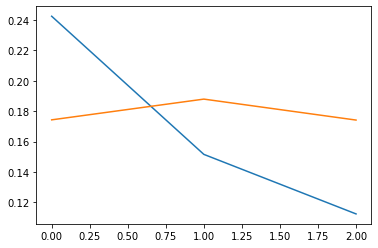

In [15]:
import matplotlib.pyplot as plt

plt.plot(range(0, 3), loss_values)
plt.plot(range(0, 3), val_loss_values)

In [16]:
train_utils.inference(model, loss, test_dataloader)

  Accuracy: 0.94
  Average Loss: 0.17
  Validation took: 0:00:50
